<a href="https://colab.research.google.com/github/lalitpandey02/Data_Analysis_using_Python_Workshop_WIMTACH/blob/main/Retail_Analytics_using_Python___WIMTACH_WORKSHOP_DRAFT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="font-family: Arial; font-size:2.5em;color:green;"> WIMTACH WORKSHOP </p>
<p style="font-family: Arial; font-size:2.5em;color:orange;"> Retail Analytics Using Python </p>

## Data: Superstore Data 

##### Import Libraries

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libarires
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


###### Import Data

In [3]:
data= pd.read_excel('superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### Shape of the Data

In [6]:
data.shape

(9994, 21)

In [7]:
# Da
print("Number of attrtibutes or variables",data.shape[1])
print("Number of customers",data.shape[0])

Number of attrtibutes or variables 21
Number of customers 9994


## List of Variables

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Descriptive  Statistics

In [9]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

###  Missing Values In Percentage

In [11]:
m=pd.DataFrame(((data.isnull().sum())/len(data))*100).reset_index()
m.columns=['Attributes','Percentage of Missing']
m

,Attributes,Percentage of Missing
0,Row ID,0.0
1,Order ID,0.0
2,Order Date,0.0
3,Ship Date,0.0
4,Ship Mode,0.0
5,Customer ID,0.0
6,Customer Name,0.0
7,Segment,0.0
8,Country,0.0
9,City,0.0


## Exttracting Month and Year from Ship Date

In [12]:
data['Month']= pd.DatetimeIndex(data['Ship Date']).month
data['Year']= pd.DatetimeIndex(data['Ship Date']).year

In [13]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Year'],
      dtype='object')

In [14]:
 data['Order Date'].dt.day_name()

0        Tuesday
1        Tuesday
2         Sunday
3         Sunday
4         Sunday
          ...   
9989     Tuesday
9990      Sunday
9991      Sunday
9992      Sunday
9993    Thursday
Name: Order Date, Length: 9994, dtype: object

### Exploring  Sales

#### Checking outliers

<Axes: xlabel='Ship Date'>

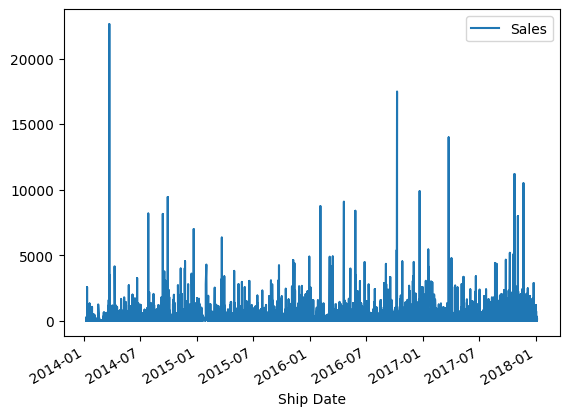

In [15]:
dt_sales= data[['Ship Date','Sales']].set_index('Ship Date')
dt_sales.plot()

### Removing Outliers

In [16]:
# outliers = data[data['SalesAmount'] > (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
# outliers2 = data[data['SalesAmount'] < (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]

#removing outliers from data:
print(data['Sales'].mean(), data['Sales'].std(), data['Sales'].mean() - 3 * data['Sales'].std(), data['Sales'].mean() + 3 * data['Sales'].std())
data = data[data['Sales'] < (data['Sales'].mean() + (3 * data['Sales'].std()))] 
data = data[data['Sales'] > (data['Sales'].mean() - (3 * data['Sales'].std()))]

229.85800083049833 623.2451005086808 -1639.877300695544 2099.593302356541


<Axes: xlabel='Ship Date'>

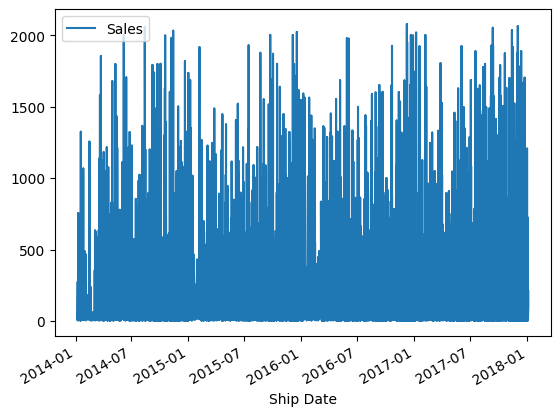

In [17]:
dt_sales2= data[['Ship Date','Sales']].set_index('Ship Date')

dt_sales2.plot()

### Year and Month  Wise Sales

In [18]:
data.groupby(data.Year).sum()['Sales']

<ipython-input-18-21843fdfeafa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.Year).sum()['Sales']


Year
2014    350375.6581
2015    397297.2200
2016    460097.2204
2017    568638.2654
2018      5159.6968
Name: Sales, dtype: float64

<ipython-input-19-0c344a960092>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.Year).sum()['Sales'].plot(kind='barh')


<Axes: ylabel='Year'>

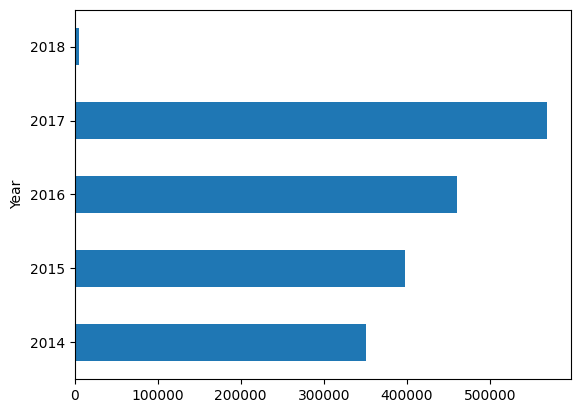

In [19]:
data.groupby(data.Year).sum()['Sales'].plot(kind='barh')

In [20]:
data.groupby(data.Month).sum()['Sales']

<ipython-input-20-5f89dfab3659>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.Month).sum()['Sales']


Month
1      78624.8734
2      57254.5424
3     114969.3120
4     108057.2678
5     109594.6879
6     134625.2497
7     125470.5570
8     129784.6595
9     237056.4583
10    141400.5110
11    256698.4765
12    288031.4652
Name: Sales, dtype: float64

<ipython-input-21-7cad13d9aa74>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.Month).sum()['Sales'].plot(kind='bar')


<Axes: xlabel='Month'>

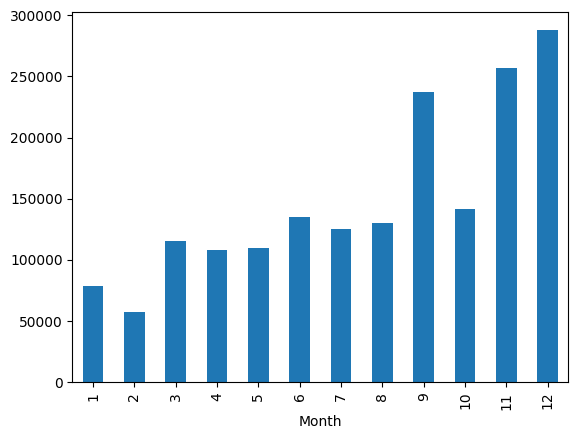

In [21]:
data.groupby(data.Month).sum()['Sales'].plot(kind='bar')

### Product Category wise Sales in Percentage

In [22]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Year'],
      dtype='object')

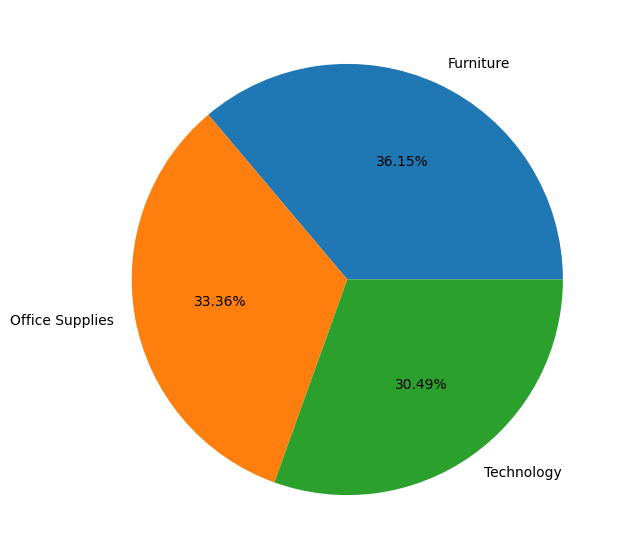

In [23]:
dk = data.groupby(['Category']).agg({'Sales':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(dk.Sales, labels = dk.Category,autopct='%1.2f%%')
# show plot 
plt.show() 



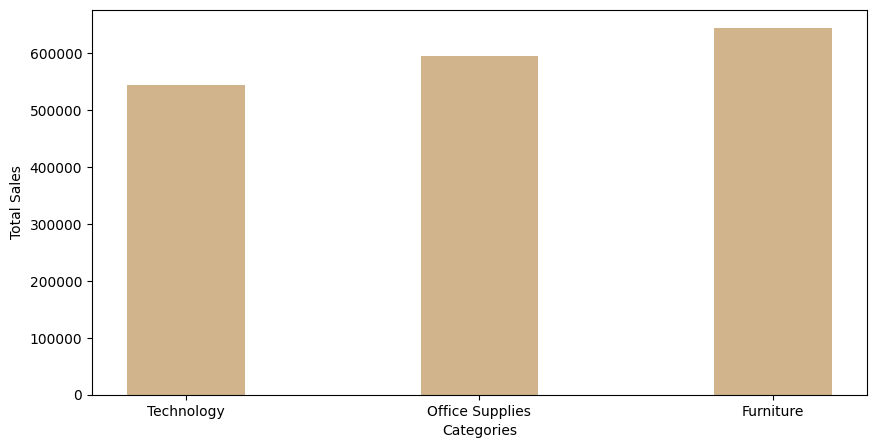

In [26]:
# Category
di=dk.sort_values('Sales')
fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(di.Category, di.Sales, color ='tan', width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total Sales")  
# show plot 
plt.show()

### Week Day Wise Sales 

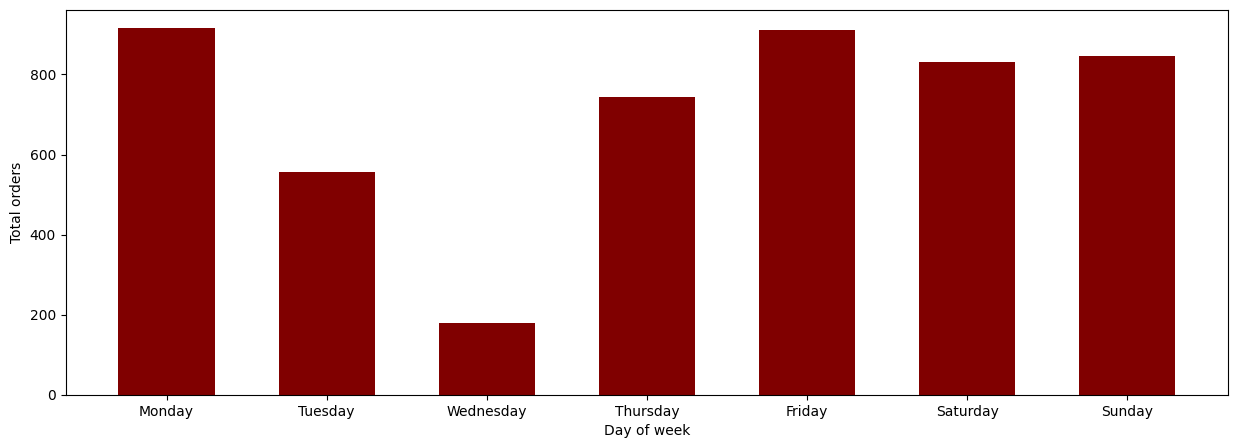

In [27]:
dj = data.groupby(['Order Date', 'Order ID']).size()
new_df = dj.to_frame(name = 'size').reset_index()
new_df['NumberofOrders']=1
new_df['day_of_week'] = new_df['Order Date'].dt.day_name()

dataSales = new_df.groupby('day_of_week')['NumberofOrders'].agg('sum').reset_index()
dataSales = dataSales.loc[[1,5,6,4,0,2,3], :]

# #plotting bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(dataSales.day_of_week, dataSales.NumberofOrders, color ='maroon', width = 0.6)
plt.xlabel("Day of week") 
plt.ylabel("Total orders") 
plt.show()

In [29]:
new_df

,Order Date,Order ID,size,NumberofOrders,day_of_week
0,2014-01-03,CA-2014-103800,1,1,Friday
1,2014-01-04,CA-2014-112326,3,1,Saturday
2,2014-01-05,CA-2014-141817,1,1,Sunday
3,2014-01-06,CA-2014-106054,1,1,Monday
4,2014-01-06,CA-2014-130813,1,1,Monday
...,...,...,...,...,...
4979,2017-12-29,US-2017-158526,5,1,Friday
4980,2017-12-30,CA-2017-115427,2,1,Saturday
4981,2017-12-30,CA-2017-126221,1,1,Saturday
4982,2017-12-30,CA-2017-143259,3,1,Saturday


In [30]:
dataSales

,day_of_week,NumberofOrders
1,Monday,916
5,Tuesday,556
6,Wednesday,179
4,Thursday,744
0,Friday,911
2,Saturday,832
3,Sunday,846


## Count of Sales per Year

In [31]:
data.groupby('Year')['Order ID'].count()

Year
2014    1914
2015    2106
2016    2544
2017    3261
2018      42
Name: Order ID, dtype: int64

<Axes: ylabel='Year'>

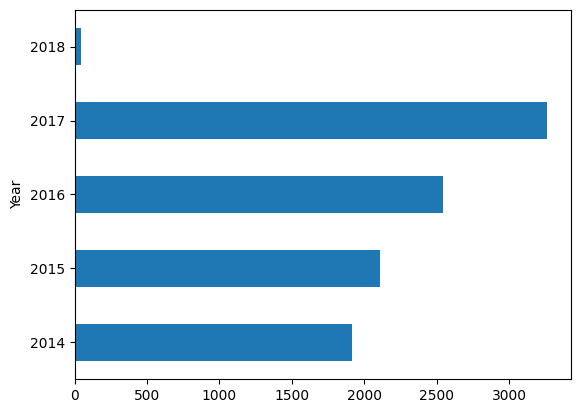

In [32]:
data.groupby('Year')['Order ID'].count().plot(kind= 'barh')

# Region wise analysis

In [33]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

<Axes: xlabel='Region'>

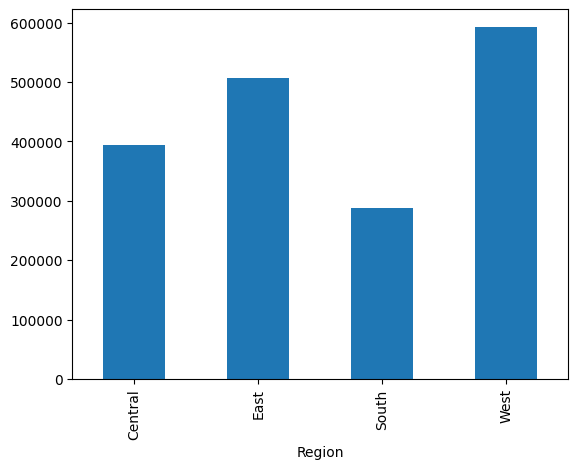

In [34]:
data.groupby('Region')['Sales'].sum().plot(kind='bar')

## Group by using Year and Category

In [35]:
data.groupby(['Year','Category'])['Sales'].sum().reset_index()

,Year,Category,Sales
0,2014,Furniture,132149.8171
1,2014,Office Supplies,111207.5750
2,2014,Technology,107018.2660
3,2015,Furniture,141475.0510
4,2015,Office Supplies,122500.1060
5,2015,Technology,133322.0630
6,2016,Furniture,175621.4454
7,2016,Office Supplies,155274.4160
8,2016,Technology,129201.3590
9,2017,Furniture,191934.1604


## Pivot Table for Sales across Year and Category

In [36]:
pd.pivot_table(data, values='Sales',index='Year',columns=['Category'],aggfunc= np.sum).reset_index()

Category,Year,Furniture,Office Supplies,Technology
0,2014,132149.8171,111207.575,107018.266
1,2015,141475.0510,122500.106,133322.063
2,2016,175621.4454,155274.416,129201.359
3,2017,191934.1604,203489.629,173214.476
4,2018,2864.4068,1887.134,408.156


In [37]:
table= pd.pivot_table(data, values='Sales',index='Year',columns=['Category'],aggfunc= np.sum).reset_index()

<Axes: xlabel='Year'>

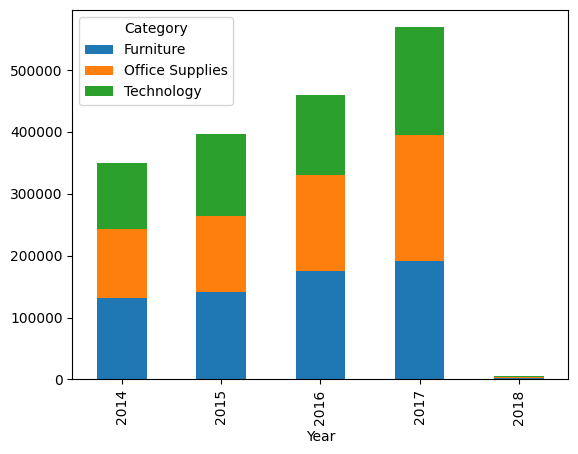

In [38]:
table.plot.bar(x='Year',y=['Furniture', 'Office Supplies','Technology'],stacked=True)

<Axes: xlabel='Year'>

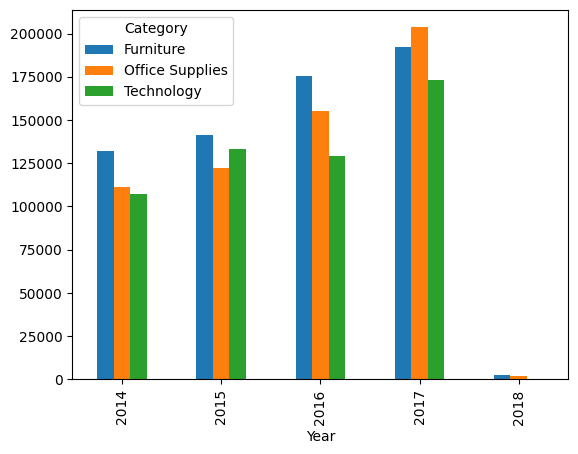

In [39]:
table.plot.bar(x='Year',y=['Furniture', 'Office Supplies','Technology'])

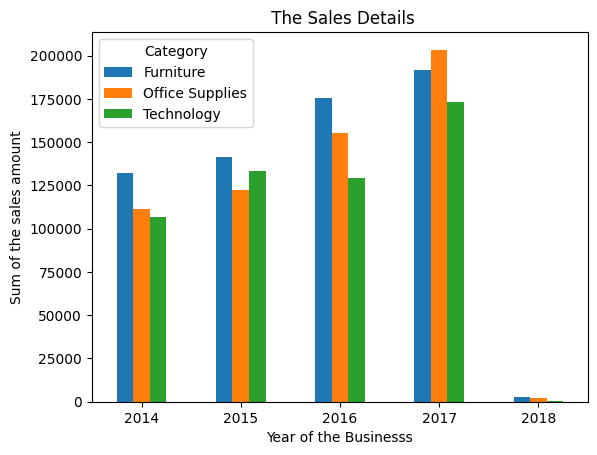

In [40]:
table.plot.bar(x='Year',y=['Furniture', 'Office Supplies','Technology'])
plt.xticks(rotation=0)
plt.xlabel('Year of the Businesss')
plt.ylabel("Sum of the sales amount")
plt.title(" The Sales Details")
          
plt.show()

# Month wise analysis

In [41]:
data.groupby(['Month','Category'])['Sales'].sum().reset_index()

,Month,Category,Sales
0,1,Furniture,27253.2804
1,1,Office Supplies,30815.7740
2,1,Technology,20555.8190
3,2,Furniture,16841.9694
4,2,Office Supplies,20060.1590
5,2,Technology,20352.4140
6,3,Furniture,41289.2330
7,3,Office Supplies,39830.7690
8,3,Technology,33849.3100
9,4,Furniture,42637.7158


<ipython-input-42-afb4e10c2d66>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Month')['Sales','Profit'].sum().plot(kind='bar')


<Axes: xlabel='Month'>

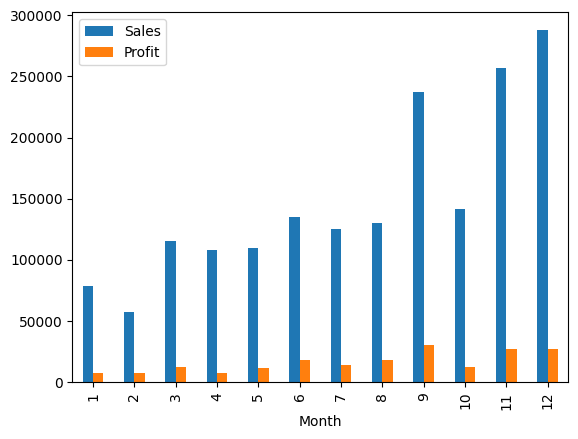

In [42]:
data.groupby('Month')['Sales','Profit'].sum().plot(kind='bar')

## Month and Region Wise Exploration

In [43]:
data.groupby([pd.Grouper(key='Ship Date', freq='M'), 'Region'])\
    .agg(unique_items=('Product ID', 'nunique'),
         total_Sales=('Sales','sum'),
         total_Profit=('Profit','sum')).head(20)

unique_items  total_Sales  total_Profit
Ship Date  Region                                          
2014-01-31 Central            19     1299.406      106.8400
           East                9      432.246      -40.6821
           South              31     6748.272     1600.2562
           West               12     2221.387       11.2906
2014-02-28 Central            21     1473.674      306.4569
           East                3      184.248       60.6745
           South               8     2028.986      279.3395
           West               18     1719.620      219.7216
2014-03-31 Central            21     2813.537     -429.8596
           East               31     5215.820     -748.5753
           South              47     6770.842      950.1297
           West               39     9769.740     1252.8140
2014-04-30 Central            30     6726.405      385.1916
           East               21     2865.974     -455.1220
           South              29     6242.287     1398.9921
           West               50    10389.749     1900.9141
2014-05-31 Central            31     2973.075     -456.1760
           East               40     7350.197      666.0500
           South              24     4056.134      470.1232
           West               29     5383.544      679.7328

In [44]:
data.resample('M',on='Ship Date').Sales.sum().head(10)

Ship Date
2014-01-31    10701.3110
2014-02-28     5406.5280
2014-03-31    24569.9390
2014-04-30    26224.4150
2014-05-31    19762.9500
2014-06-30    32725.2796
2014-07-31    22625.3600
2014-08-31    30245.2420
2014-09-30    40726.5743
2014-10-31    30656.7050
Freq: M, Name: Sales, dtype: float64

In [45]:
data_M= data.resample('M',on='Order Date').Sales.sum()

In [46]:
data_M= pd.DataFrame(data_M).reset_index()
data_M.head()

,Order Date,Sales
0,2014-01-31,11663.075
1,2014-02-28,4519.892
2,2014-03-31,29552.599
3,2014-04-30,24131.295
4,2014-05-31,20932.357


## Filtering

In [47]:
dl= data.set_index('Order Date')
dl.loc['2016':'2017']

<ipython-input-47-4f5b17786a2b>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dl.loc['2016':'2017']


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,11,2016
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,11,2016
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,6,2016
2017-04-15,13,CA-2017-114412,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,4,2017
2016-12-05,14,CA-2016-161389,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-17,9989,CA-2017-163629,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,11,2017
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,3,2017
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,3,2017


In [48]:
data.loc[data['Region']== 'South',['Region','Sales'] ]

,Region,Sales
0,South,261.9600
1,South,731.9400
3,South,957.5775
4,South,22.3680
12,South,15.5520
...,...,...
9971,South,140.7500
9980,South,85.9800
9987,South,79.9900
9988,South,206.1000


###  Interactive Graph  with Slide Bar using Plotly

In [49]:
import plotly.express as px
fig = px.line(data_M, x = 'Order Date',y='Sales',title = 'Monthly Sales')

fig.update_xaxes(rangeslider_visible=True)
fig.show()   

# RFM Analysis

#### RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.


#### Recency: The number of days between present date (i.e. Today) and date of last purchase of each customer. First define today's date and then get the `.max()` function of `InvoiceDate` to calculate the number of days between today and date of last purchase.

####  Frequency: How often has a customer transacted or interacted with the brand during a particular period of time? Clearly, customers with frequent activities are more engaged, and probably more loyal, than customers who rarely do so. And one-time-only customers are in a class of their own.

####  Monetary: Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time. Big spenders should usually be treated differently than customers who spend little. Looking at monetary divided by frequency indicates the average purchase amount – an important secondary factor to consider when segmenting customers.

###  RFM factors illustrate these facts:
##### the more recent the purchase, the more responsive the customer is to promotions
##### the more frequently the customer buys, the more engaged and satisfied they are
##### monetary value differentiates heavy spenders from low-value purchasers   

### The maximum and minimum date 

In [50]:
data['Order Date'].max(), data['Order Date'].min()

(Timestamp('2017-12-30 00:00:00'), Timestamp('2014-01-03 00:00:00'))

In [51]:

TODAY = dt.datetime(2017,12,31)

In [52]:
rfm = data.groupby("Customer ID").agg({"Order Date": lambda date: (TODAY - date.max()).days,
                                        "Order ID": lambda num: num.nunique(),
                                        "Sales": lambda price: price.sum()})

In [53]:
# Change the name of columns
rfm.columns=["recency", "frequency", "monetary"]

In [54]:
rfm

,recency,frequency,monetary
Customer ID,,,
AA-10315,185,5,1633.488
AA-10375,20,9,1056.390
AA-10480,260,4,1790.512
AA-10645,56,6,5086.935
AB-10015,416,3,886.156
...,...,...,...
XP-21865,44,11,2374.658
YC-21895,5,5,2520.020
YS-21880,10,8,3926.916


In [55]:
print("Recency: {} to {}".format(rfm.recency.min(), rfm.recency.max()))
print("Frequency: {} to {}".format(rfm.frequency.min(), rfm.frequency.max()))
print("Monetary: {} to {}".format(rfm.monetary.min(), rfm.monetary.max()))

Recency: 1 to 1166
Frequency: 1 to 17
Monetary: 4.833000000000001 to 8331.986


# Customer Life Time Value

####  Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship" (Source). CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help you to answers the most important questions about sales to every company: 


    How to Identify the most profitable customers?
    How can a company offer the best product and make the most money?
    How to segment profitable customers?
    How much budget need to spend to acquire customers?


# Aggregate Model

The most simplest and the oldest method of computing CLV is this Aggregate/Average method. This assumes a constant average spend and churn rate for all the customers.

This method does not differentiate between customers and produces a single value for CLV at an overall Level. This leads to unrealistic estimates if some of the customers transacted in high value and high volume, which ultimately skews the average CLV value.

The General Formula for calculating CLV is:


### CLV = ((Average Sales X Purchase Frequency) / Churn) X Profit Margin  

**Where,**  
  **Average Sales = TotalSales/Total no. of orders**
   
   **Purchase Frequency = Total no. of orders/Total unique customers**
   
   **Retention rate = Total no. of orders greater than 1/ Total unique customers**
   
   **Churn = 1 - Retention rate**
   
   **Profit Margin = Based on business context**

In this example case,  the Profit margin for each transaction is assumed to be 5%.

### Slicing Data for CLV Analaysis

In [56]:
data_clv= data[['Customer ID','Order ID', 'Order Date', 'Sales']]
data_clv.head(2)

,Customer ID,Order ID,Order Date,Sales
0,CG-12520,CA-2016-152156,2016-11-08,261.96
1,CG-12520,CA-2016-152156,2016-11-08,731.94


In [57]:

customer = data_clv.groupby('Customer ID').agg({'Order Date':lambda x: (x.max() - x.min()).days, 
                                                   'Order ID': lambda x: len(x),
                                                  'Sales': lambda x: sum(x)})

customer.columns = ['Days', 'Frequency', 'TotalSales']
customer.head()

,Days,Frequency,TotalSales
Customer ID,,,
AA-10315,1186,10,1633.488
AA-10375,1330,15,1056.390
AA-10480,1077,12,1790.512
AA-10645,1232,18,5086.935
AB-10015,996,6,886.156


In [58]:
customer.shape

(793, 3)

In [59]:
data_clv['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [60]:
data_clv['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [61]:
# Calculating the necessary variables for CLV calculation
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

Average sales: $2246.62
Purchase Frequency: 12.44
Churn: 0.01%


In [62]:
customer['TotalSales'].mean()

2246.6179832282473

In [63]:
# Calculating the CLV
Profit_margin = 0.05 

CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $139739.76


#   Conversion Rate

In [64]:
data.groupby('Year')['Order ID'].count()

Year
2014    1914
2015    2106
2016    2544
2017    3261
2018      42
Name: Order ID, dtype: int64

In [65]:
dt= pd.DataFrame(data.groupby('Year')['Order ID'].count()).reset_index()
dt.columns=['Year', 'No. of Transactions']
dt

,Year,No. of Transactions
0,2014,1914
1,2015,2106
2,2016,2544
3,2017,3261
4,2018,42


In [66]:
dt['Footfall']= [10000,15000,20000,25000,30000]

In [67]:
dt

,Year,No. of Transactions,Footfall
0,2014,1914,10000
1,2015,2106,15000
2,2016,2544,20000
3,2017,3261,25000
4,2018,42,30000


In [68]:
dt['Conversion Rate']= dt['No. of Transactions']/dt['Footfall']
dt

,Year,No. of Transactions,Footfall,Conversion Rate
0,2014,1914,10000,0.19140
1,2015,2106,15000,0.14040
2,2016,2544,20000,0.12720
3,2017,3261,25000,0.13044
4,2018,42,30000,0.00140


# Market Basket Analysis

# Frequency of Most Popular Item 

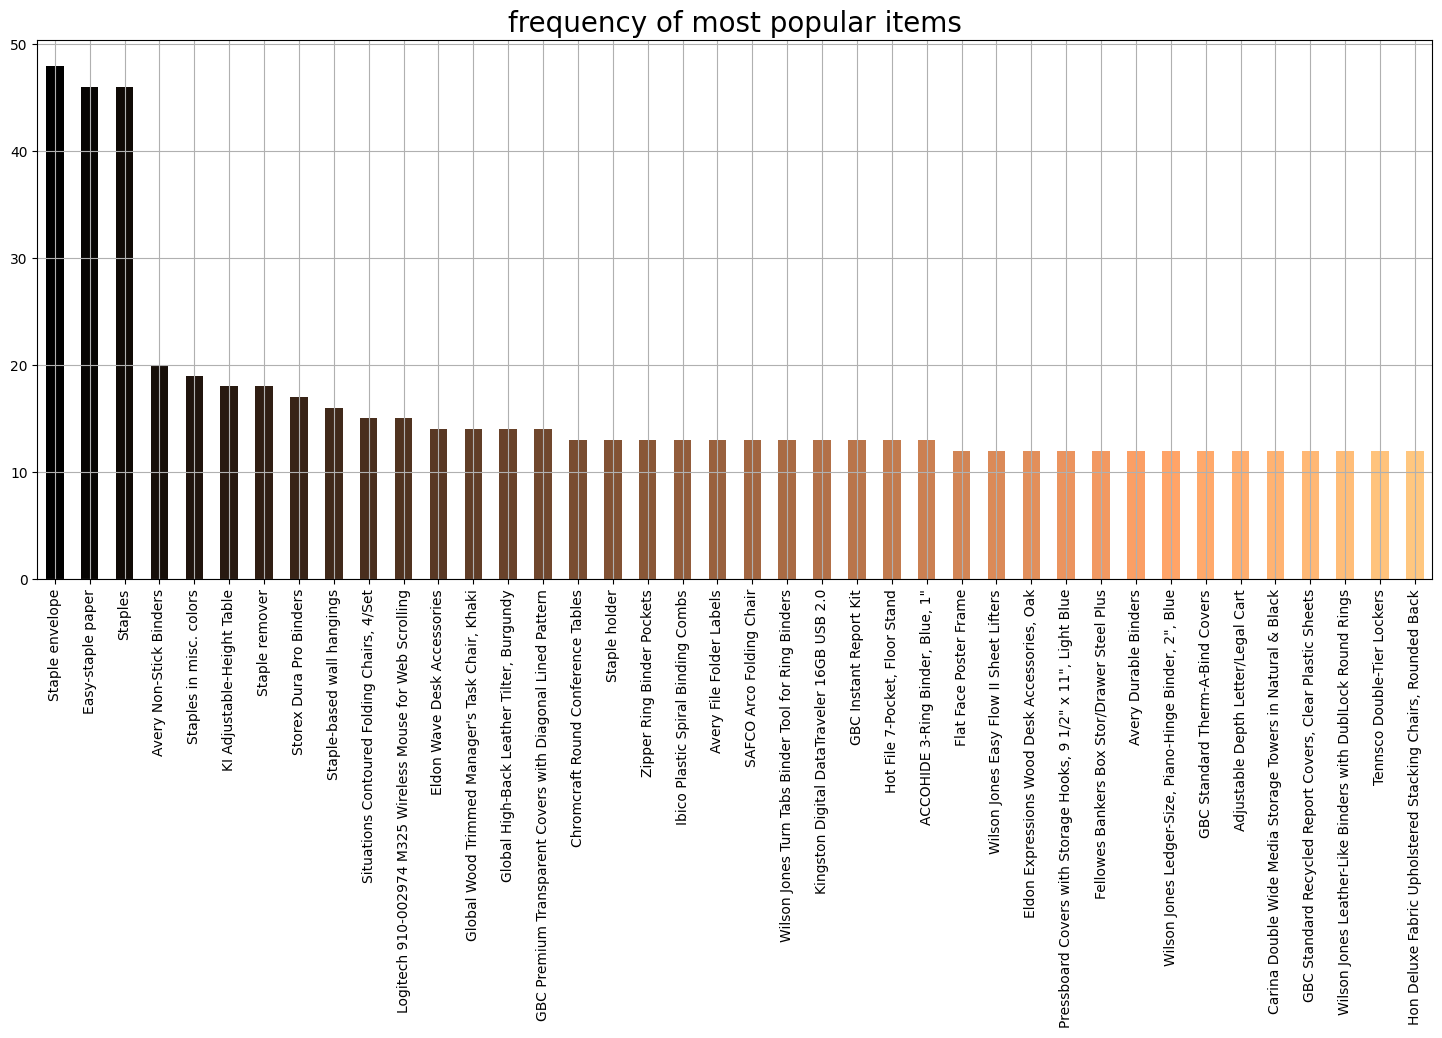

In [69]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['Product Name'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [70]:
y = data['Product Name'].value_counts().head(50).to_frame()


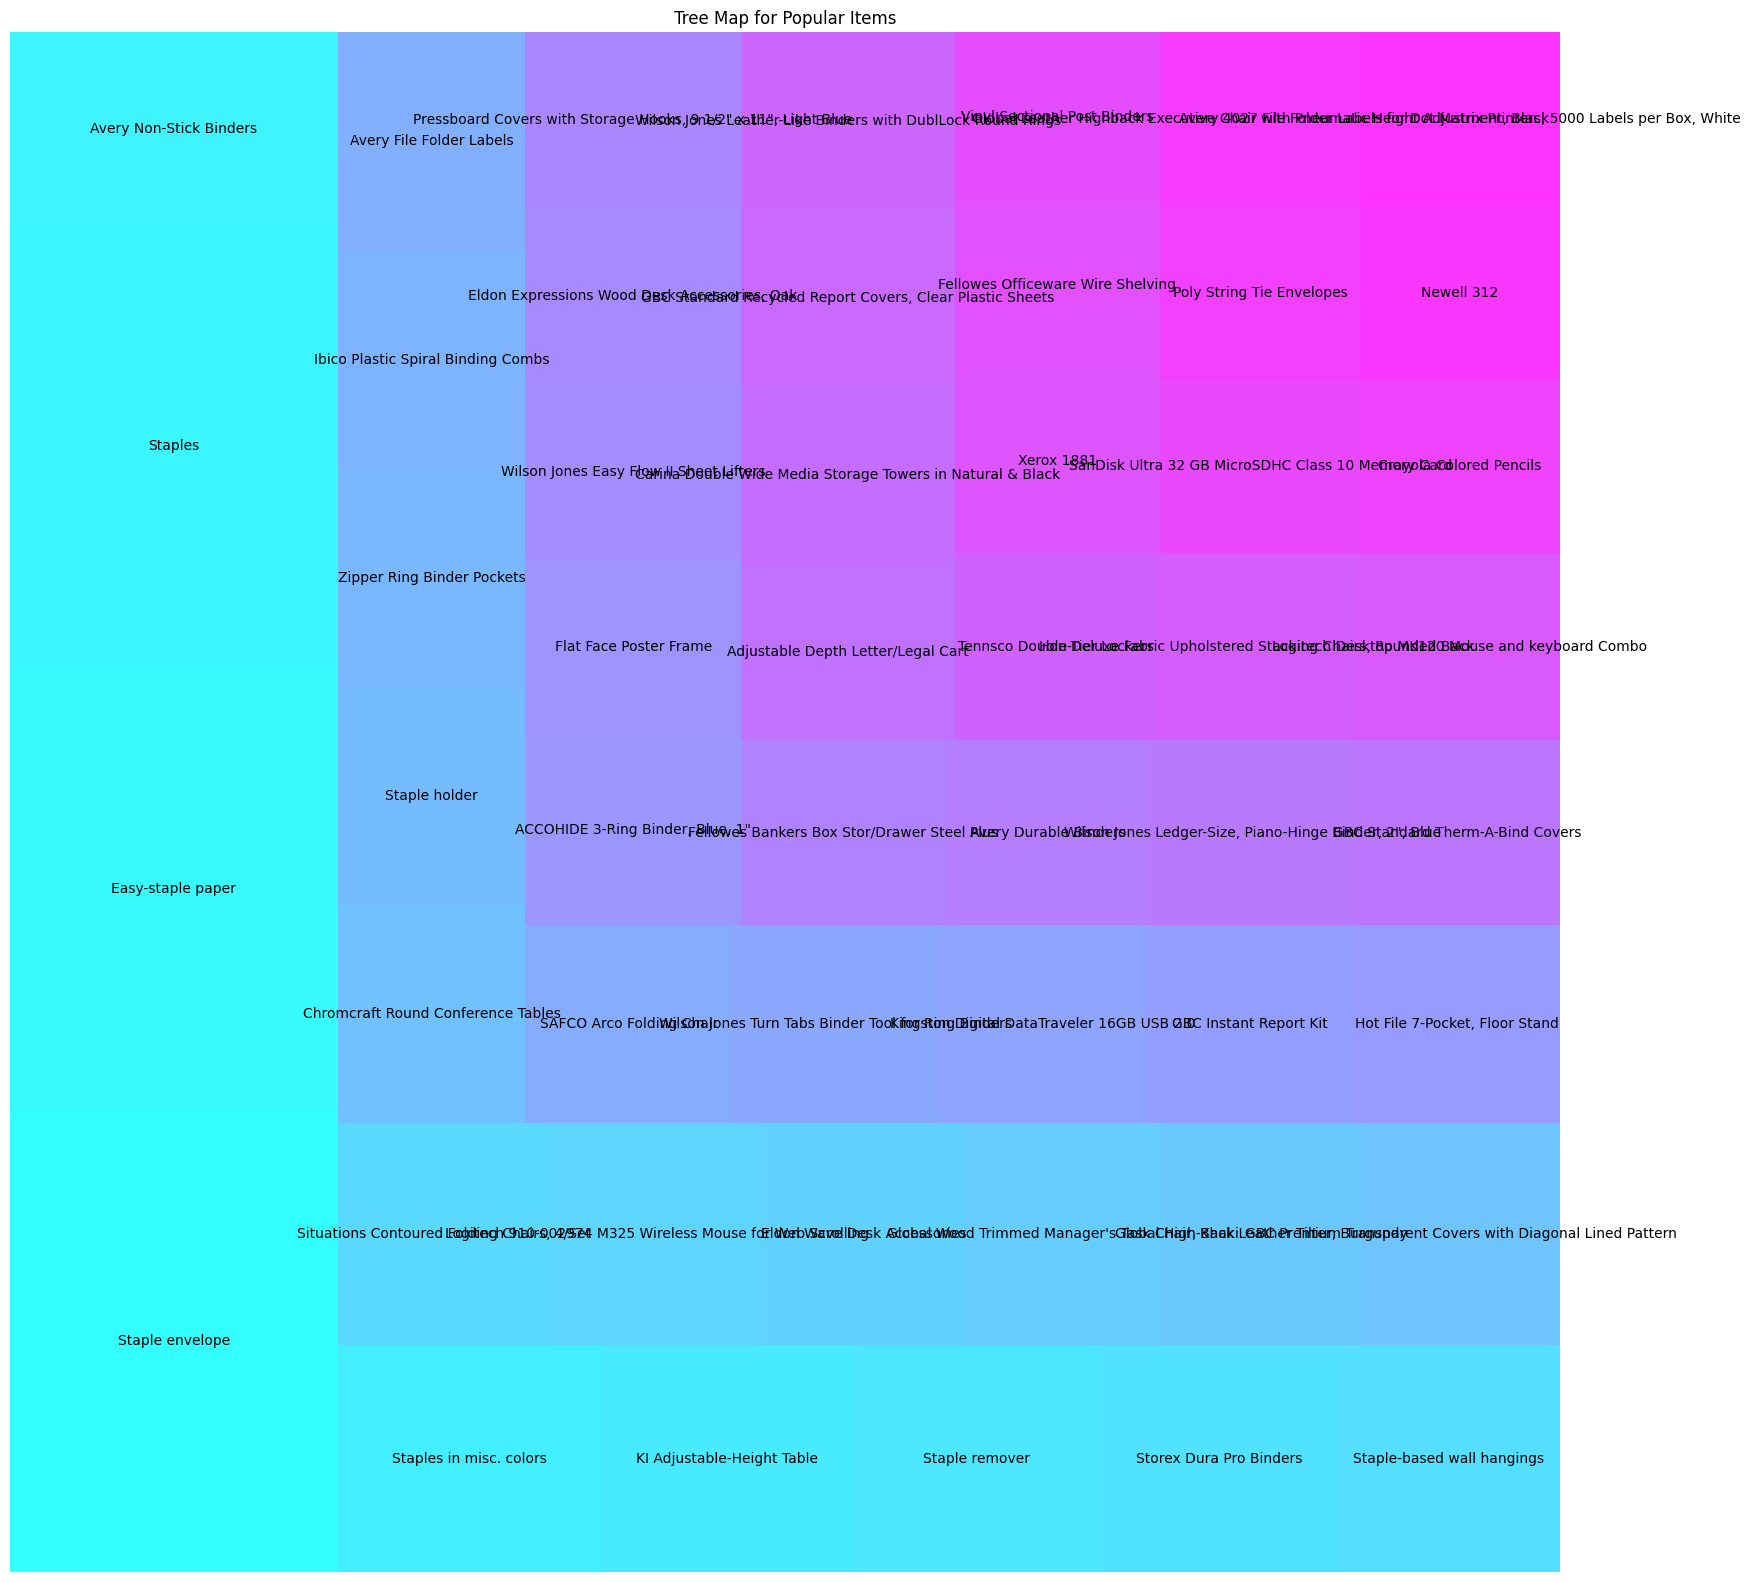

In [71]:
# plotting 

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

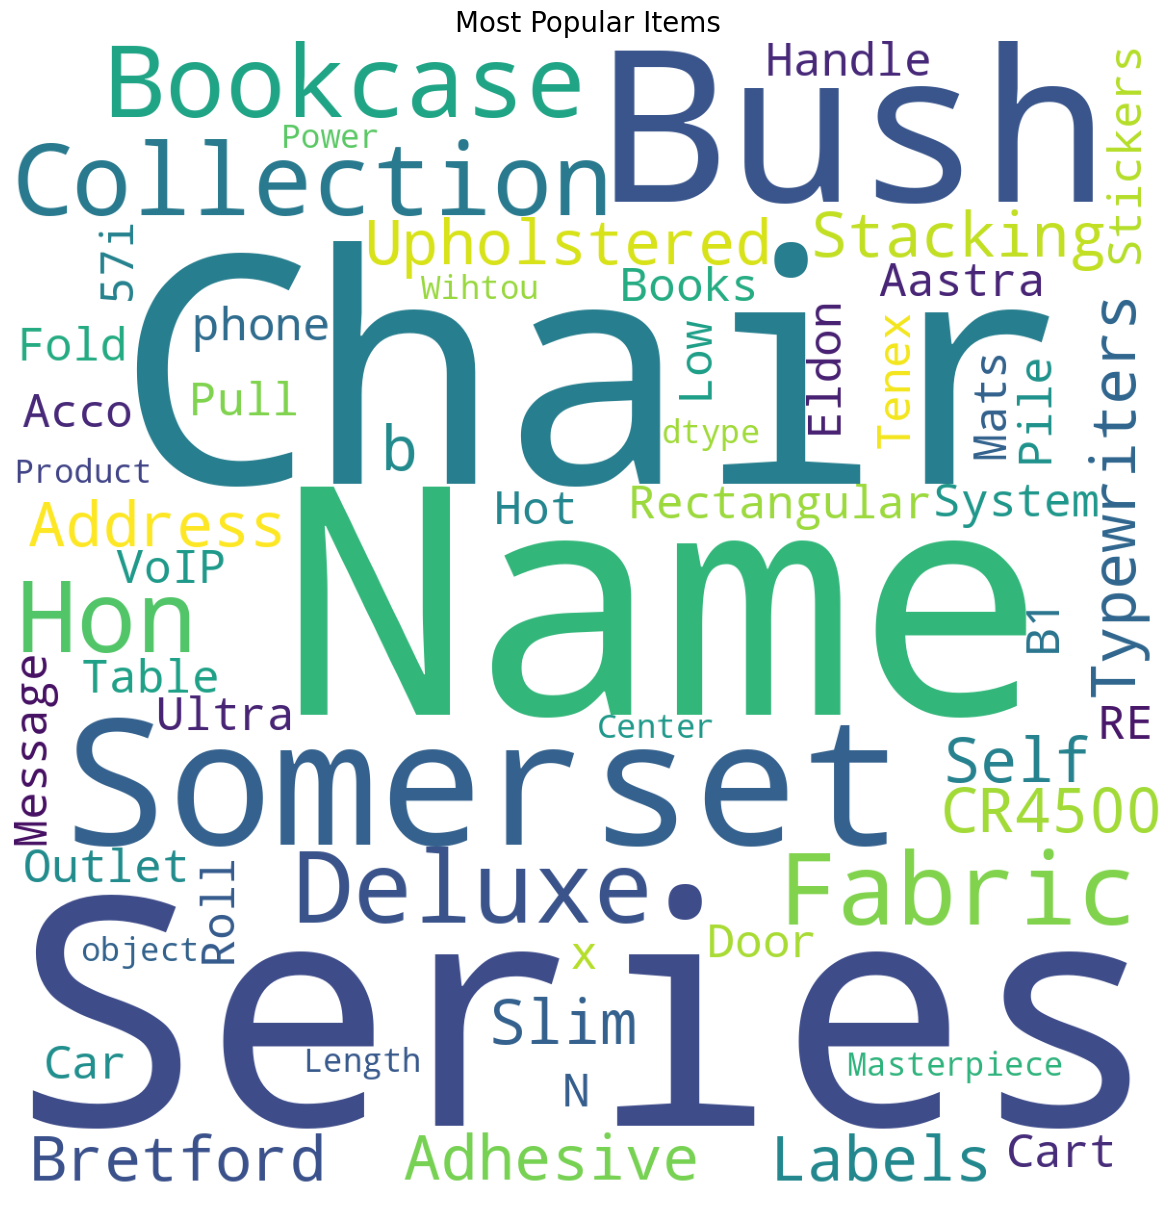

In [72]:


from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data['Product Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [73]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [75]:
data['Product Name'].value_counts().head(10)

Staple envelope                               48
Easy-staple paper                             46
Staples                                       46
Avery Non-Stick Binders                       20
Staples in misc. colors                       19
KI Adjustable-Height Table                    18
Staple remover                                18
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: Product Name, dtype: int64

In [76]:
df=data.groupby("Product Name").filter(lambda x: len(x) > 14)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,10,2017
132,133,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,OFF-FA-10002780,Office Supplies,Fasteners,Staples,21.456,9,0.2,6.9732,2,2017
162,163,CA-2016-154508,2016-11-16,2016-11-20,Standard Class,RD-19900,Ruben Dartt,Consumer,United States,Carlsbad,...,OFF-EN-10001990,Office Supplies,Envelopes,Staple envelope,28.400,5,0.0,13.3480,11,2016
239,240,CA-2016-157749,2016-06-04,2016-06-09,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,Chicago,...,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,11.688,3,0.6,-4.6752,6,2016
271,272,CA-2015-155334,2015-07-30,2015-07-31,First Class,HA-14920,Helen Andreada,Consumer,United States,San Francisco,...,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,209.930,7,0.0,92.3692,7,2015


In [77]:
df['Product Name'].value_counts()

Staple envelope                                              48
Easy-staple paper                                            46
Staples                                                      46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Situations Contoured Folding Chairs, 4/Set                   15
Name: Product Name, dtype: int64

In [78]:
dt= df.groupby(['Order ID','Product Name'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID')
dt

Product Name,Avery Non-Stick Binders,Easy-staple paper,KI Adjustable-Height Table,Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,"Situations Contoured Folding Chairs, 4/Set",Staple envelope,Staple remover,Staple-based wall hangings,Staples,Staples in misc. colors,Storex Dura Pro Binders
Order ID,,,,,,,,,,,
CA-2014-101931,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-102673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
CA-2014-103366,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-103492,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-104283,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
US-2017-147669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
US-2017-153948,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
US-2017-164147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [79]:
def one_hot_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

dt_encode= dt.applymap(one_hot_encode)

In [80]:
dt_efilter= dt_encode[(dt_encode >0).sum(axis=1)>=2]

In [81]:
dt_efilter

Product Name,Avery Non-Stick Binders,Easy-staple paper,KI Adjustable-Height Table,Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,"Situations Contoured Folding Chairs, 4/Set",Staple envelope,Staple remover,Staple-based wall hangings,Staples,Staples in misc. colors,Storex Dura Pro Binders
Order ID,,,,,,,,,,,
CA-2014-111934,0,1,0,0,0,0,0,0,0,0,1
CA-2014-138317,0,0,0,1,0,1,0,0,0,0,0
CA-2014-160766,0,0,1,0,0,1,0,0,0,0,0
CA-2015-137946,1,0,0,0,0,0,0,0,0,0,1
CA-2016-111213,1,0,0,0,0,0,1,0,0,0,0
CA-2016-116918,1,0,0,0,0,0,0,0,0,1,0
CA-2017-104885,0,1,0,0,0,1,0,0,0,0,0
CA-2017-131807,0,0,1,0,0,0,0,0,1,0,0
CA-2017-148404,0,0,1,0,0,0,0,0,1,0,0


In [82]:
frequent_itemsets_plus= apriori(dt_efilter, min_support= 0.05,use_colnames= True).sort_values('support', ascending= False).reset_index(drop=True)

In [83]:
rules = association_rules(frequent_itemsets_plus, metric="lift", min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Staples),(KI Adjustable-Height Table),0.222222,0.333333,0.222222,1.000000,3.00,0.148148,inf
1,(KI Adjustable-Height Table),(Staples),0.333333,0.222222,0.222222,0.666667,3.00,0.148148,2.333333
2,(Staple remover),(Avery Non-Stick Binders),0.111111,0.333333,0.111111,1.000000,3.00,0.074074,inf
3,(Avery Non-Stick Binders),(Staple remover),0.333333,0.111111,0.111111,0.333333,3.00,0.074074,1.333333
4,(Avery Non-Stick Binders),(Staples in misc. colors),0.333333,0.111111,0.111111,0.333333,3.00,0.074074,1.333333
5,(Staples in misc. colors),(Avery Non-Stick Binders),0.111111,0.333333,0.111111,1.000000,3.00,0.074074,inf
6,(Storex Dura Pro Binders),(Easy-staple paper),0.222222,0.222222,0.111111,0.500000,2.25,0.061728,1.555556
7,(Easy-staple paper),(Storex Dura Pro Binders),0.222222,0.222222,0.111111,0.500000,2.25,0.061728,1.555556
8,(Logitech 910-002974 M325 Wireless Mouse for W...,(Staple envelope),0.111111,0.333333,0.111111,1.000000,3.00,0.074074,inf
9,(Staple envelope),(Logitech 910-002974 M325 Wireless Mouse for W...,0.333333,0.111111,0.111111,0.333333,3.00,0.074074,1.333333
